In [54]:
# Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [56]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [57]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [58]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [59]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [60]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cidreira br
pevek ru
gouyave gd
dikson ru
sitka us
hilo us
linares cl
port antonio jm
mahebourg mu
tiksi ru
bambous virieux mu
vaini to
busselton au
new norfolk au
saint george bm
mataura pf
grand gaube mu
hobart au
lewiston us
upernavik gl
barrow us
halifax ca
colquiri bo
mataura pf
hokitika nz
carnarvon au
airai pw
kisangani cd
bredasdorp za
northam au
uglovskoye ru
rikitea pf
karratha au
ushuaia ar
tasiilaq gl
barentsburg sj
dikson ru
ushuaia ar
mataura pf
mataura pf
yellowknife ca
bluff nz
hobart au
yellowknife ca
jieshi cn
bluff nz
bodden town ky
atuona pf
buin pg
mahibadhoo mv
rikitea pf
tessalit ml
ketchikan us
cidreira br
high level ca
mwingi ke
port lincoln au
dalen no
new norfolk au
atuona pf
mount gambier au
olgina ee
baghdad iq
albany au
bluff nz
constitucion mx
hirara jp
new norfolk au
port alfred za
emba kz
albany au
pevek ru
new norfolk au
yerbogachen ru
boca do acre br
kaitangata nz
butaritari ki
port alfred za
saint-philippe re
port alfred za
atuona pf
kapaa us
chuy uy

avarua ck
tawkar sd
yerbogachen ru
hirara jp
ushuaia ar
ushuaia ar
buckeye us
mys shmidta ru
avesta se
zachagansk kz
new norfolk au
bambous virieux mu
pisco pe
georgetown sh
punta arenas cl
chokurdakh ru
hilo us
lompoc us
thompson ca
port alfred za
lompoc us
vaitupu wf
uarini br
esperance au
calama cl
atuona pf
puerto ayora ec
qaanaaq gl
ust-omchug ru
ushuaia ar
avarua ck
kembe cf
cherskiy ru
mataura pf
ushuaia ar
ous ru
karratha au
onega ru
mitu co
barrow us
mataura pf
masuguru tz
romans-sur-isere fr
hithadhoo mv
richards bay za
pisco pe
tubuala pa
hasaki jp
hobart au
mawlaik mm
kodiak us
avarua ck
avarua ck
hofn is
provideniya ru
busselton au
te anau nz
caceres br
rikitea pf
acapulco mx
sale au
illoqqortoormiut gl
berlevag no
hithadhoo mv
deputatskiy ru
bredasdorp za
albany au
pemangkat id
hermanus za
barrow us
san quintin mx
tsihombe mg
hilo us
kropotkin ru
leiyang cn
kapaa us
awjilah ly
chuzhou cn
lebu cl
fortuna us
atuona pf
longyearbyen sj
taolanaro mg
port augusta au
morondava m

In [61]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [62]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [63]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79a6d25a73fe54ae93090984447d3b5f


In [64]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [65]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | gouyave
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | sitka
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | linares
Processing Record 8 of Set 1 | port antonio
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | saint george
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | grand gaube
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | lewiston
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | halifax
Processing Record 23 of Set 1 | colquiri
Processi

Processing Record 34 of Set 4 | bandarbeyla
Processing Record 35 of Set 4 | hambantota
Processing Record 36 of Set 4 | guthrie
Processing Record 37 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 38 of Set 4 | klaksvik
Processing Record 39 of Set 4 | onega
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | upington
Processing Record 42 of Set 4 | safaga
Processing Record 43 of Set 4 | quatre cocos
Processing Record 44 of Set 4 | khani
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | seredka
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | faya
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | bonfim
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | ko samui
Processing Record 3 of Set 5 | katsuura
Processing Record 4 of Set 5 | evensk
Processing Record 5 of Set 5 | kaerepere
Processing Record 6 of Set 5 | les cayes
Processing Reco

Processing Record 22 of Set 8 | mitu
Processing Record 23 of Set 8 | masuguru
Processing Record 24 of Set 8 | romans-sur-isere
Processing Record 25 of Set 8 | tubuala
Processing Record 26 of Set 8 | hasaki
Processing Record 27 of Set 8 | mawlaik
Processing Record 28 of Set 8 | kodiak
Processing Record 29 of Set 8 | hofn
Processing Record 30 of Set 8 | te anau
Processing Record 31 of Set 8 | caceres
Processing Record 32 of Set 8 | acapulco
Processing Record 33 of Set 8 | sale
Processing Record 34 of Set 8 | berlevag
Processing Record 35 of Set 8 | deputatskiy
Processing Record 36 of Set 8 | pemangkat
Processing Record 37 of Set 8 | san quintin
Processing Record 38 of Set 8 | kropotkin
Processing Record 39 of Set 8 | leiyang
Processing Record 40 of Set 8 | awjilah
Processing Record 41 of Set 8 | chuzhou
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | morondava
Processing Record 44 of Set 8 | bullhead city
Processing Record 45 of Set 8 | abu samrah
Processing Recor

Processing Record 9 of Set 12 | yarada
Processing Record 10 of Set 12 | ponta delgada
Processing Record 11 of Set 12 | salalah
Processing Record 12 of Set 12 | shelbyville
Processing Record 13 of Set 12 | puerto leguizamo
Processing Record 14 of Set 12 | ituni
City not found. Skipping...
Processing Record 15 of Set 12 | huntington
Processing Record 16 of Set 12 | banjar
Processing Record 17 of Set 12 | nacala
Processing Record 18 of Set 12 | skibbereen
Processing Record 19 of Set 12 | soldatskiy
City not found. Skipping...
Processing Record 20 of Set 12 | waipawa
Processing Record 21 of Set 12 | fergus falls
Processing Record 22 of Set 12 | choucheng
City not found. Skipping...
Processing Record 23 of Set 12 | yugorsk
Processing Record 24 of Set 12 | paamiut
Processing Record 25 of Set 12 | shitkino
Processing Record 26 of Set 12 | wichian buri
Processing Record 27 of Set 12 | oranjestad
Processing Record 28 of Set 12 | zhangye
Processing Record 29 of Set 12 | srednekolymsk
Processing 

In [66]:
len(city_data)

579

In [67]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,64.76,57,0,6.08,BR,2021-06-13 16:39:23
1,Pevek,69.7008,170.3133,39.54,68,50,1.34,RU,2021-06-13 16:39:23
2,Gouyave,12.1646,-61.7296,84.97,70,75,18.41,GD,2021-06-13 16:39:24
3,Dikson,73.5069,80.5464,33.30,99,100,11.36,RU,2021-06-13 16:39:24
4,Sitka,57.0531,-135.3300,53.49,76,40,0.00,US,2021-06-13 16:37:23
5,Hilo,19.7297,-155.0900,69.80,81,42,5.99,US,2021-06-13 16:35:17
6,Linares,-35.8500,-71.6000,60.89,75,100,4.83,CL,2021-06-13 16:39:24
7,Port Antonio,18.1800,-76.4612,92.91,67,68,13.80,JM,2021-06-13 16:39:25
8,Mahebourg,-20.4081,57.7000,75.49,69,75,16.11,MU,2021-06-13 16:39:25
9,Tiksi,71.6872,128.8694,42.48,87,100,5.35,RU,2021-06-13 16:39:25


In [68]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [69]:
# reorder columns
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cidreira,BR,2021-06-13 16:39:23,-30.1811,-50.2056,64.76,57,0,6.08
1,Pevek,RU,2021-06-13 16:39:23,69.7008,170.3133,39.54,68,50,1.34
2,Gouyave,GD,2021-06-13 16:39:24,12.1646,-61.7296,84.97,70,75,18.41
3,Dikson,RU,2021-06-13 16:39:24,73.5069,80.5464,33.30,99,100,11.36
4,Sitka,US,2021-06-13 16:37:23,57.0531,-135.3300,53.49,76,40,0.00
5,Hilo,US,2021-06-13 16:35:17,19.7297,-155.0900,69.80,81,42,5.99
6,Linares,CL,2021-06-13 16:39:24,-35.8500,-71.6000,60.89,75,100,4.83
7,Port Antonio,JM,2021-06-13 16:39:25,18.1800,-76.4612,92.91,67,68,13.80
8,Mahebourg,MU,2021-06-13 16:39:25,-20.4081,57.7000,75.49,69,75,16.11
9,Tiksi,RU,2021-06-13 16:39:25,71.6872,128.8694,42.48,87,100,5.35


In [70]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

Text(0, 0.5, 'Max Temperature (F)')

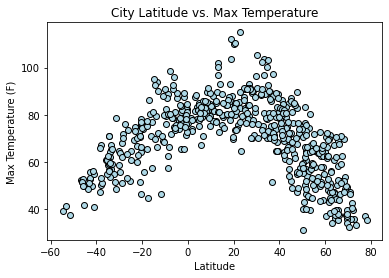

In [84]:
# create scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], 
            marker = "o", 
            c = "lightblue", 
            edgecolors="black")
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

In [85]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

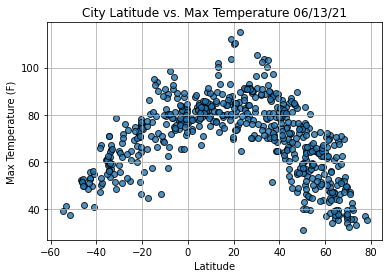

In [87]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

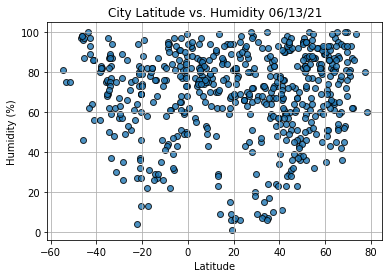

In [88]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

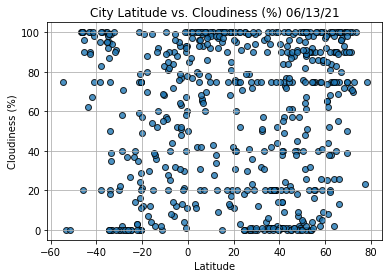

In [89]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

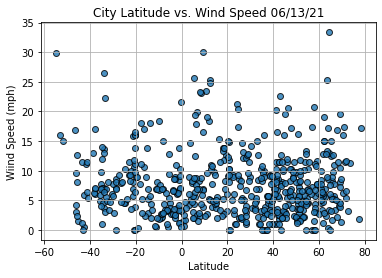

In [90]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wiind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()